# Part II - Factors that Influence a Borrower's APR
## by Tunmise Oluwadare

## Investigation Overview


Borrower's APR (Annual Percentage Rate) is an important metric in lending and borrowing. It represents the cost of borrowing, including interest and other fees, as an annualized percentage of the loan amount.

The importance of borrower's APR lies in the fact that it is a key factor in determining the affordability of a loan. A lower APR means a borrower will pay less in interest over the life of the loan, making it easier to manage debt and potentially saving money. A higher APR, on the other hand, can make a loan more expensive and difficult to pay back.
Borrower's APR is used by lenders to assess the creditworthiness of borrowers.

This investigation aims to evaluate key Loan attributes that influence a Borrower's APR

## Dataset Overview

The dataset contains data on over 100,000 loans originated between 2006 and 2014. Each loan in the dataset includes information on the borrower's credit score, income, employment status, loan amount, loan status, and other relevant borrower and loan characteristics.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Data = pd.read_csv('prosperLoanData.csv')

In [3]:
columns = ['BorrowerAPR', 'Term', 'BorrowerRate', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'LoanOriginalAmount', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome']
Loan = Data.loc[:, columns]

## Borrower's APR Distribution

BorrowerAPR initially looked unimodal with peak values just a little lower than 0.2 but on a closer inspection, it seems values between 0.3 and 0.4 have the highest occurence with a very distinct peak greater than 7000 but less than 8000

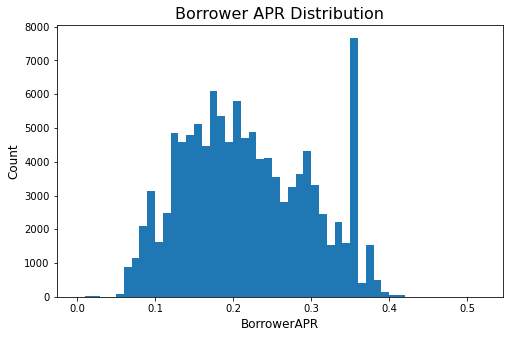

In [4]:
plt.figure(figsize=(8,5))

binsize = np.arange(0, Loan['BorrowerAPR'].max()+0.01, 0.01)
plt.hist(data=Loan, x = 'BorrowerAPR', bins = binsize)
plt.xlabel('BorrowerAPR', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Borrower APR Distribution', fontsize = 16)

plt.show()

## Employment Status of Borrowers

Most of the borrowers granted loan were employed. This makes sense because it would be easy for them to repay the funds borrowed.

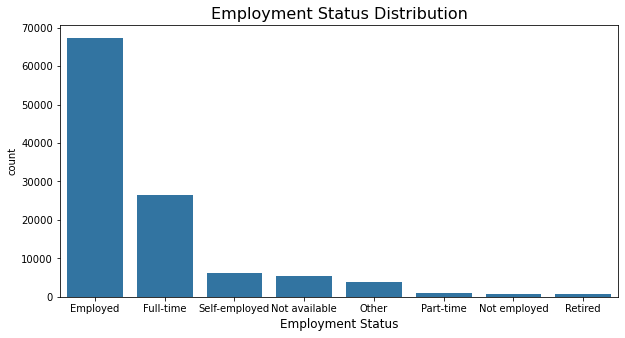

In [5]:
plt.figure(figsize= (10,5))
colour = sns.color_palette()[0]
Employment_order = Loan['EmploymentStatus'].value_counts().index

sns.countplot(data=Loan, x='EmploymentStatus', color = colour, order = Employment_order)

plt.xlabel('Employment Status', fontsize = 12)
plt.title("Employment Status Distribution", fontsize = 16)

plt.show()

## Debt-to-Income Ratio Distribution 

The Debt-to-Income distribution is right-skewed, meaning that the majority of borrowers have a DTI below the median. The median Debt-to-Income in the dataset is around 22%, indicating that the majority of borrowers have a manageable level of debt relative to their income

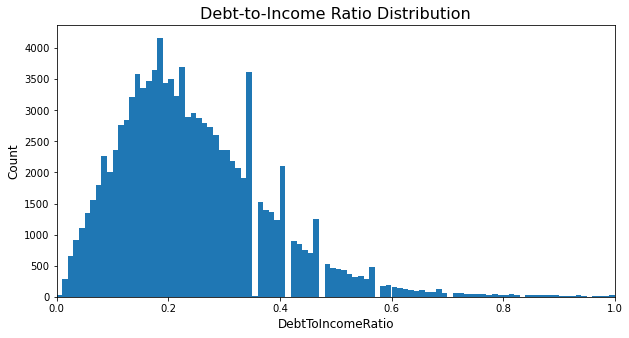

In [6]:
plt.figure(figsize =(10,5))
bins = np.arange(0, 1+0.01, 0.01)

plt.hist(data=Loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim(0, 1.0)

plt.xlabel('DebtToIncomeRatio', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Debt-to-Income Ratio Distribution', fontsize = 16)

plt.show()

## Amount of Loan Borrowed Distribution

Notable amount borrowed fall between 4000 and 5000 dollars, 10000 and 20000 dollars. On a loagrithmic scale, amount of Loan Borrowed distribution is a unimodal distribution, with the majority of loans falling within the range of  4,000 𝑡𝑜 12,000. The median loan amount is around 10,000 𝑎𝑛𝑑 𝑡ℎ𝑒 𝑚𝑒𝑎𝑛 𝑙𝑜𝑎𝑛 𝑎𝑚𝑜𝑢𝑛𝑡 𝑖𝑠 𝑎𝑝𝑝𝑟𝑜𝑥𝑖𝑚𝑎𝑡𝑒𝑙𝑦 8,500. it was noticed that round figure loans (e.g 5000, 10,000, 15,000) have a higher peak compared to other amounts.

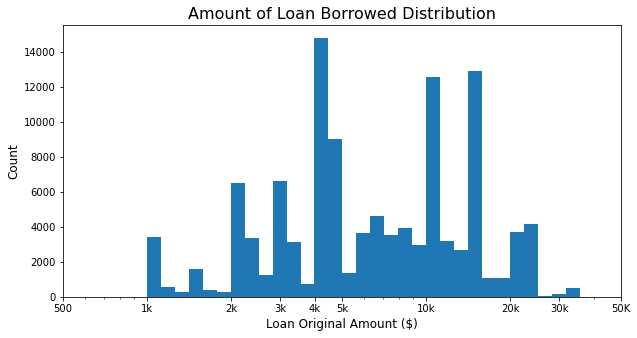

In [7]:
log_binsize = 0.05
log_bins = 10 ** np.arange(np.log10(Loan['LoanOriginalAmount'].min()), np.log10(Loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = Loan, x = 'LoanOriginalAmount', bins = log_bins);
plt.xscale('log')

plt.xticks([500, 1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '4k', '5k', '10k', '20k', '30k', '50K'])
plt.xlabel('Loan Original Amount ($)', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Amount of Loan Borrowed Distribution', fontsize = 16)

plt.show()

## Borrower Rate Disribution

The Borrower Rate Distribution has two peaks. The first between midpoint 10% and 20% and the second peak at a higher peak around 30%. Also the average Brorrower Rate is 19.2%

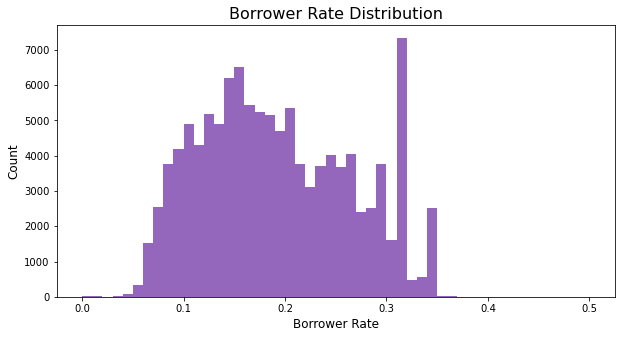

In [8]:
plt.figure(figsize=(10,5))
bins = np.arange(0, Loan['BorrowerRate'].max()+0.01, 0.01)
colour = sns.color_palette()[4]

plt.hist(data=Loan, x = 'BorrowerRate', bins = bins, color = colour )

plt.xlabel('Borrower Rate', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title("Borrower Rate Distribution", fontsize = 16)

plt.show()

## Interaction Between Borrower APR and Employment status with Borrower Rate

The heatmap highlights the importance of employment status in determining the interest rate a borrower is offered by the lender.

Borrowers who are not employed, retired, or have a part-time job have the highest APR and Borrower Rate, while those who are employed full-time have the lowest APR and Borrower Rate. 

Borrowers who are self-employed have the highest range of APR and Borrower Rate, suggesting that being self-employed is considered a high-risk factor by the lenders. 

The heatmap also shows that the highest range of APR and Borrower Rate is observed among the unemployed borrowers, indicating that being unemployed is a significant risk factor. 

Borrowers who are employed but have an unknown employment status have a higher range of APR and Borrower Rate compared to other employed categories, suggesting that unknown employment status is also considered a high-risk factor by the lenders.  
It also shows that unemployed borrowers and self-employed borrowers are considered high-risk by the lenders, and therefore, have higher APR and Borrower Rate.

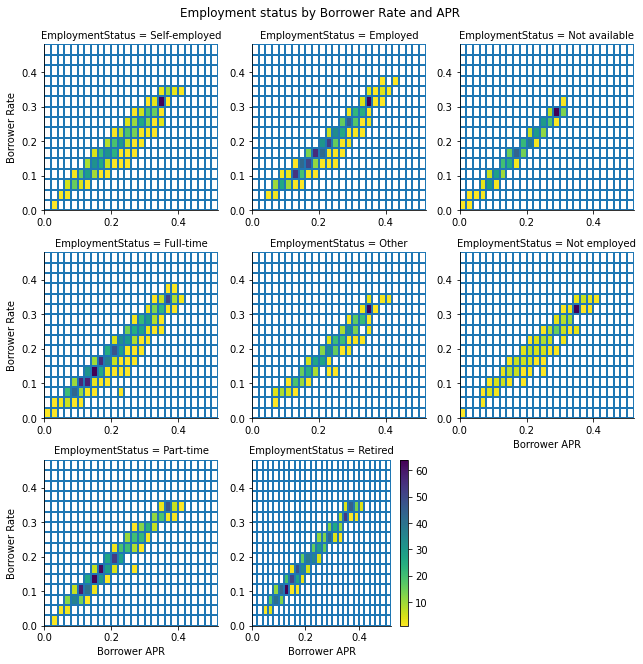

In [9]:
# Plotting heatmap using seaborn's facetgrid.
bins_x = np.arange(0,Loan['BorrowerAPR'].max()+0.01,0.02)
bins_y = np.arange(0,Loan['BorrowerRate'].max()+0.01,0.03)

g = sns.FacetGrid(data = Loan, col = 'EmploymentStatus', sharex=False,sharey=False,col_wrap = 3, height = 3)
g.map(plt.hist2d, 'BorrowerAPR', 'BorrowerRate',bins=[bins_x,bins_y], cmap = 'viridis_r', cmin = 0.5)

g.set_xlabels('Borrower APR')
g.set_ylabels('Borrower Rate')
g.fig.suptitle('Employment status by Borrower Rate and APR', y=1.02)

plt.colorbar()
plt.show()

## Variable Interaction Between Employment Status, Loan Original Amount and Debt-to-Income Ratio

The heatmap of Employment vs. Loan Original Amount and Debt-to-Income Ratio reveals interesting insights about the relationship between these variables. It shows that borrowers with higher income levels and higher credit scores tend to apply for larger loans. 

Additionally, borrowers with higher debt-to-income ratios tend to apply for larger loans, regardless of their employment status. 

Moreover, the heatmap also reveals that employed borrowers tend to have higher loan amounts and lower debt-to-income ratios compared to other employment categories.

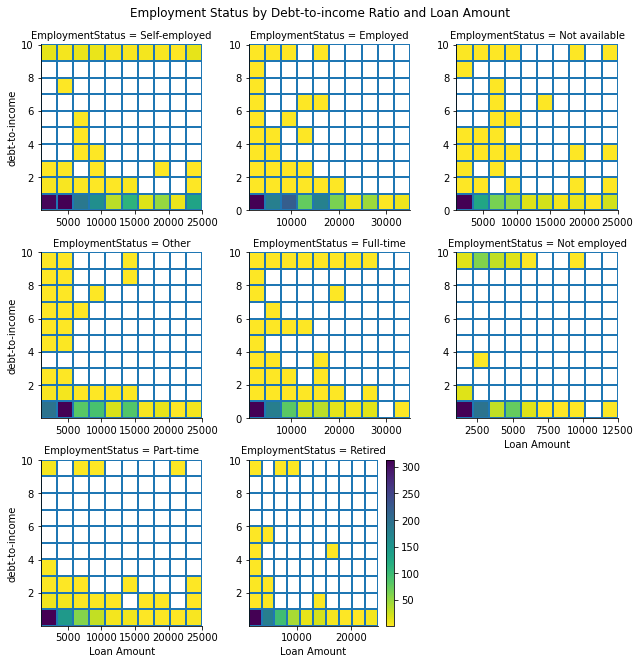

In [10]:
# Plotting heatmap using seaborn's facetgrid.
copy = Loan.copy()
Loan_copy= copy.dropna()

bins = (np.arange(0,1+0.01,0.02))**1/3
tick = [0,0.1,0.2,0.3,0.4,0.6,0.8,1]
labels = ['{}'.format(v)for v in tick]
bins_y = np.log10(np.arange(1000, Loan_copy['LoanOriginalAmount'].max()+40,1500))
tick_y=[]

g = sns.FacetGrid(data = Loan_copy, col = 'EmploymentStatus', sharex=False,sharey=False,col_wrap = 3, height = 3)
g.map(plt.hist2d, 'LoanOriginalAmount', 'DebtToIncomeRatio', cmap = 'viridis_r', cmin = 0.5)

g.set_xlabels('Loan Amount')
g.set_ylabels('debt-to-income')
g.fig.suptitle('Employment Status by Debt-to-income Ratio and Loan Amount', y=1.02)

plt.colorbar()
plt.show()

In [11]:
!jupyter nbconvert ProsperLoan_Part_2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook ProsperLoan_Part_2.ipynb to slides
[NbConvertApp] Writing 741066 bytes to ProsperLoan_Part_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Admin\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Admin\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Admin\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Admin\anaconda3\lib\site-packages\nbconvert\nbconver